In [49]:
import pandas as pd
import pandas  as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import imblearn
from imblearn.over_sampling import SMOTE , RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import learning_curve,validation_curve
from sklearn.svm import SVC
from mlxtend.plotting import plot_learning_curves


In [2]:
df = pd.read_csv(r'/content/train_chunk_data_complete.csv')
indexNames = df[ df['genre'] == 'Unlabelled'].index
df.drop(indexNames , inplace=True)
df.drop(['book_id'],axis = 1)
print(df.genre.value_counts())
print(df.shape)

Literary                       10447
Detective and Mystery           1344
Sea and Adventure                415
Western Stories                  208
Love and Romance                 186
Humorous and Wit and Satire       79
Christmas Stories                 45
Ghost and Horror                  36
Allegories                         6
Name: genre, dtype: int64
(12766, 23)


In [3]:
df1 = df.drop(['book_id'],axis = 1)
col_list = df.columns.to_list() 
print(col_list.count)
print(df1.shape)
df1.head() 

<built-in method count of list object at 0x7f209e77e5c8>
(12766, 22)


,genre,Positive_Sentiment,Neutral_Sentiment,Negative_Sentiment,Coord_Conjunctions,Interjections,Flesch_Score,Average_Sentence_Length,Male_Orientation,Female_Orientation,Colons,Commas,Hyphens,Periods,Personal_Pronoun,Possesive_Pronoun,Prepositions,Semi_Colons,Paragraphs,Quotes,TTR,Characters
0,Literary,0.186,0.769,0.046,523,5,49.49,157.491803,821,140,3,462,36,191,2688,152,375,52,47,38.0,0.202239,49
1,Literary,0.134,0.785,0.081,511,3,56.63,117.737500,906,221,3,483,35,211,2656,123,278,59,77,79.5,0.202239,49
2,Literary,0.148,0.776,0.076,567,11,55.20,115.903766,749,113,2,491,43,196,2552,139,279,66,68,77.5,0.202239,49
3,Literary,0.146,0.750,0.103,548,24,56.83,103.198529,798,144,12,479,37,231,2617,142,314,77,82,96.5,0.202239,49
4,Literary,0.127,0.779,0.094,559,24,57.84,102.297101,828,198,6,534,55,253,2633,150,240,53,88,112.0,0.202239,49


**Scaling**

In [4]:
def scaledown(columnlist):
  for i in columnlist:
    if str(i) == 'genre' or str(i) == 'Positive_Sentiment' or str(i) == 'Neutral_Sentiment' or str(i) == 'Negative_Sentiment'  or  str(i) == 'book_id' or i == 'TTR':
      pass
    else:
      df1[str(i)] = MinMaxScaler().fit_transform(np.array(df1[str(i)]).reshape(-1, 1))
scaledown(col_list)
df1.head()

,genre,Positive_Sentiment,Neutral_Sentiment,Negative_Sentiment,Coord_Conjunctions,Interjections,Flesch_Score,Average_Sentence_Length,Male_Orientation,Female_Orientation,Colons,Commas,Hyphens,Periods,Personal_Pronoun,Possesive_Pronoun,Prepositions,Semi_Colons,Paragraphs,Quotes,TTR,Characters
0,Literary,0.186,0.769,0.046,0.657035,0.030675,0.421277,0.423280,0.715780,0.220126,0.009677,0.418100,0.089330,0.064658,0.840639,0.558824,0.930521,0.319018,0.109557,0.110465,0.202239,0.483333
1,Literary,0.134,0.785,0.081,0.641960,0.018405,0.479705,0.312932,0.789887,0.347484,0.009677,0.437104,0.086849,0.071429,0.830620,0.452206,0.689826,0.361963,0.179487,0.231105,0.202239,0.483333
2,Literary,0.148,0.776,0.076,0.712312,0.067485,0.468003,0.307842,0.653008,0.177673,0.006452,0.444344,0.106700,0.066351,0.798059,0.511029,0.692308,0.404908,0.158508,0.225291,0.202239,0.483333
3,Literary,0.146,0.750,0.103,0.688442,0.147239,0.481342,0.272575,0.695728,0.226415,0.038710,0.433484,0.091811,0.078199,0.818410,0.522059,0.779156,0.472393,0.191142,0.280523,0.202239,0.483333
4,Literary,0.127,0.779,0.094,0.702261,0.147239,0.489607,0.270073,0.721883,0.311321,0.019355,0.483258,0.136476,0.085647,0.823419,0.551471,0.595533,0.325153,0.205128,0.325581,0.202239,0.483333


In [5]:
data_split_label = pd.DataFrame([])
data_split = pd.DataFrame([])
#data.drop(dataframe[dataframe['genre'] == 'Allegories'].index, inplace = True)
data_split_label = df1['genre']
data_split = df1.drop(['genre'], axis = 1) 
print(data_split_label.shape)
print(data_split.shape)

(12766,)
(12766, 21)


In [6]:
Train_features, Validation_data, Train_label, Validation_label = train_test_split(data_split, data_split_label, train_size = 0.8,random_state = 42)

print(Train_features.shape)
print(Validation_data.shape)
print(Train_label.shape)
print(Validation_label.shape)
print(Train_label.value_counts())
print(Validation_label.value_counts())

(10212, 21)
(2554, 21)
(10212,)
(2554,)
Literary                       8356
Detective and Mystery          1085
Sea and Adventure               333
Western Stories                 162
Love and Romance                150
Humorous and Wit and Satire      57
Christmas Stories                37
Ghost and Horror                 28
Allegories                        4
Name: genre, dtype: int64
Literary                       2091
Detective and Mystery           259
Sea and Adventure                82
Western Stories                  46
Love and Romance                 36
Humorous and Wit and Satire      22
Ghost and Horror                  8
Christmas Stories                 8
Allegories                        2
Name: genre, dtype: int64


In [7]:
print(Train_label.value_counts())

Literary                       8356
Detective and Mystery          1085
Sea and Adventure               333
Western Stories                 162
Love and Romance                150
Humorous and Wit and Satire      57
Christmas Stories                37
Ghost and Horror                 28
Allegories                        4
Name: genre, dtype: int64


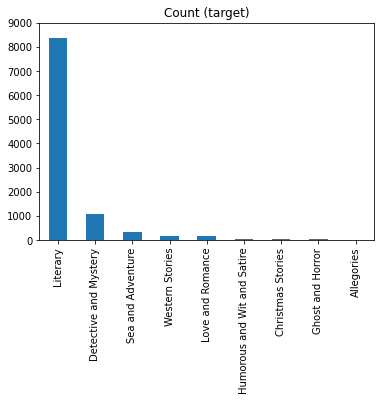

In [8]:
Train_label.value_counts().plot(kind='bar', title='Count (target)', ylim = [0,9000]);

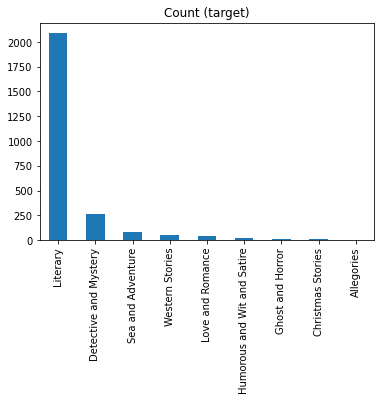

In [9]:
Validation_label.value_counts().plot(kind='bar', title='Count (target)');

**UnderSampling**

In [57]:
#print("Before UnderSampling, counts of label 'Literary': {}".format(sum(Train_label == 'Literary'))) 
#print("After UnderSampling, counts of label 'Literary': {}".format(sum(Underfit_Labels == 'Literary'))) 


In [10]:
sampling_strategy = {'Literary':5855}
ros = RandomUnderSampler(random_state=42,sampling_strategy=sampling_strategy)
print("Before UnderSampling, counts of label 'Literary': {}".format(sum(Train_label == 'Literary'))) 
Underfit_Feature,Underfit_Labels = ros.fit_sample(Train_features, Train_label)
print("After UnderSampling, counts of label 'Literary': {}".format(sum(Underfit_Labels == 'Literary'))) 
#print(Underfit_Feature.shape)
#print(Underfit_Labels.shape)


Before UnderSampling, counts of label 'Literary': 8356
After UnderSampling, counts of label 'Literary': 5855


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
und_dataframe.genre.value_counts()

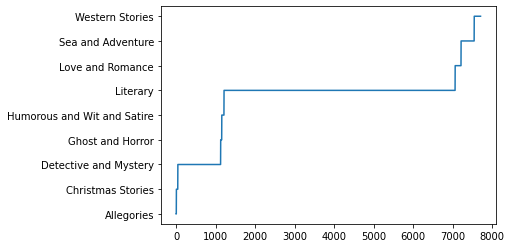

In [59]:
fig, ax = plt.subplots()
ax.plot(Underfit_Labels, label="dog")

In [11]:
print(col_list)
col_list.pop(0)


['book_id', 'genre', 'Positive_Sentiment', 'Neutral_Sentiment', 'Negative_Sentiment', 'Coord_Conjunctions', 'Interjections', 'Flesch_Score', 'Average_Sentence_Length', 'Male_Orientation', 'Female_Orientation', 'Colons', 'Commas', 'Hyphens', 'Periods', 'Personal_Pronoun', 'Possesive_Pronoun', 'Prepositions', 'Semi_Colons', 'Paragraphs', 'Quotes', 'TTR', 'Characters']


'book_id'

In [12]:
col_list.pop(0)
print(col_list)

['Positive_Sentiment', 'Neutral_Sentiment', 'Negative_Sentiment', 'Coord_Conjunctions', 'Interjections', 'Flesch_Score', 'Average_Sentence_Length', 'Male_Orientation', 'Female_Orientation', 'Colons', 'Commas', 'Hyphens', 'Periods', 'Personal_Pronoun', 'Possesive_Pronoun', 'Prepositions', 'Semi_Colons', 'Paragraphs', 'Quotes', 'TTR', 'Characters']


In [15]:
Underfit_Features = pd.DataFrame(data= Underfit_Feature, columns= col_list)
Underfit_Features.loc[:,'genre'] = pd.Series(Underfit_Labels, index=Underfit_Features.index)


Literary                       5855
Detective and Mystery          1085
Sea and Adventure               333
Western Stories                 162
Love and Romance                150
Humorous and Wit and Satire      57
Christmas Stories                37
Ghost and Horror                 28
Allegories                        4
Name: genre, dtype: int64


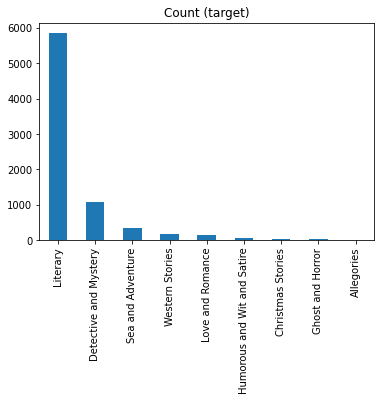

In [16]:
print(Underfit_Features.genre.value_counts())

Underfit_Features.genre.value_counts().plot(kind='bar', title='Count (target)');

**OverSampling**



In [17]:
print(Underfit_Features.shape)
Final_Labels = pd.DataFrame([])
x = Underfit_Features['genre']
Underfit_Features = Underfit_Features.drop(['genre'],axis = 1)
print(Underfit_Features.shape)
Final_Labels['genre'] = x
print(Final_Labels)

(7711, 22)
(7711, 21)
                  genre
0            Allegories
1            Allegories
2            Allegories
3            Allegories
4     Christmas Stories
...                 ...
7706    Western Stories
7707    Western Stories
7708    Western Stories
7709    Western Stories
7710    Western Stories

[7711 rows x 1 columns]


In [18]:
Final_Labels.genre.value_counts()

Literary                       5855
Detective and Mystery          1085
Sea and Adventure               333
Western Stories                 162
Love and Romance                150
Humorous and Wit and Satire      57
Christmas Stories                37
Ghost and Horror                 28
Allegories                        4
Name: genre, dtype: int64

In [19]:
Final_Labels.shape

(7711, 1)

In [20]:
sampling_strategy_smote ={'Allegories':18,'Ghost and Horror':39,'Christmas Stories':45 ,'Humorous and Wit and Satire':84,'Love and Romance':181,'Western Stories':224,'Sea and Adventure':444,'Detective and Mystery':1371}
Smoteobj = SMOTE(k_neighbors=3,sampling_strategy=sampling_strategy_smote)
#print("After OverSampling, counts of label 'Literary': {}".format(sum(Final_Labels == 'Literary'))) 
#print("After OverSampling, counts of label 'Allegories': {} \n".format(sum(Final_Labels == 'Allegories'))) 
X_train_res, y_train_res = Smoteobj.fit_sample(Underfit_Feature, Final_Labels)
print("After OverSampling, counts of label 'Literary': {}".format(sum(y_train_res == 'Literary'))) 
print("After OverSampling, counts of label 'Allegories': {} \n".format(sum(y_train_res == 'Allegories'))) 

After OverSampling, counts of label 'Literary': 5855
After OverSampling, counts of label 'Allegories': 18 



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=F

In [21]:
print(X_train_res.shape)
print(y_train_res.shape)

smote_data = pd.DataFrame(y_train_res)
smote_data['genre'] = pd.DataFrame(y_train_res)


(8261, 21)
(8261,)


In [69]:
print(len(col_list))

21


In [22]:
df3 = pd.DataFrame(data= X_train_res, columns= col_list)
df3.loc[:,'genre'] = pd.Series(y_train_res, index=df3.index)
print(df3.columns)

Index(['Positive_Sentiment', 'Neutral_Sentiment', 'Negative_Sentiment',
       'Coord_Conjunctions', 'Interjections', 'Flesch_Score',
       'Average_Sentence_Length', 'Male_Orientation', 'Female_Orientation',
       'Colons', 'Commas', 'Hyphens', 'Periods', 'Personal_Pronoun',
       'Possesive_Pronoun', 'Prepositions', 'Semi_Colons', 'Paragraphs',
       'Quotes', 'TTR', 'Characters', 'genre'],
      dtype='object')


In [23]:
df3.genre.value_counts()

Literary                       5855
Detective and Mystery          1371
Sea and Adventure               444
Western Stories                 224
Love and Romance                181
Humorous and Wit and Satire      84
Christmas Stories                45
Ghost and Horror                 39
Allegories                       18
Name: genre, dtype: int64

In [72]:
df3.to_csv('Train_data.csv',index=False)


In [73]:
print(Validation_data.shape)
Validation_label.shape

(2554, 21)


(2554,)

In [24]:
Validation_data1 = pd.concat([Validation_data,Validation_label],axis =1,sort=False)
print(Validation_data1)

       Positive_Sentiment  Neutral_Sentiment  ...  Characters            genre
1697                0.150              0.746  ...    0.583333         Literary
8916                0.135              0.795  ...    0.666667         Literary
4618                0.166              0.735  ...    0.616667         Literary
11752               0.109              0.782  ...    0.466667  Western Stories
10032               0.140              0.772  ...    0.666667         Literary
...                   ...                ...  ...         ...              ...
10289               0.156              0.714  ...    0.500000         Literary
565                 0.125              0.737  ...    0.316667         Literary
5617                0.155              0.757  ...    0.616667         Literary
1803                0.100              0.840  ...    0.666667         Literary
10042               0.124              0.756  ...    0.666667         Literary

[2554 rows x 22 columns]


In [25]:
Validation_data1.genre.value_counts()

Literary                       2091
Detective and Mystery           259
Sea and Adventure                82
Western Stories                  46
Love and Romance                 36
Humorous and Wit and Satire      22
Ghost and Horror                  8
Christmas Stories                 8
Allegories                        2
Name: genre, dtype: int64

In [ ]:
Validation_data1.to_csv('Ground_truth1.csv', index=False)

In [26]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train_res,y_train_res)
pred = model.predict(Validation_data)
from sklearn import metrics
score = metrics.accuracy_score(Validation_label, pred)
score1 = metrics.classification_report(Validation_label, pred )
print(score1)
print("accuracy:   %0.5f" % score)

                             precision    recall  f1-score   support

                 Allegories       1.00      0.50      0.67         2
          Christmas Stories       0.17      0.38      0.23         8
      Detective and Mystery       0.29      0.56      0.38       259
           Ghost and Horror       0.17      0.75      0.28         8
Humorous and Wit and Satire       0.14      0.32      0.19        22
                   Literary       0.91      0.67      0.77      2091
           Love and Romance       0.18      0.42      0.25        36
          Sea and Adventure       0.13      0.40      0.20        82
            Western Stories       0.20      0.35      0.26        46

                   accuracy                           0.64      2554
                  macro avg       0.36      0.48      0.36      2554
               weighted avg       0.79      0.64      0.69      2554

accuracy:   0.63821


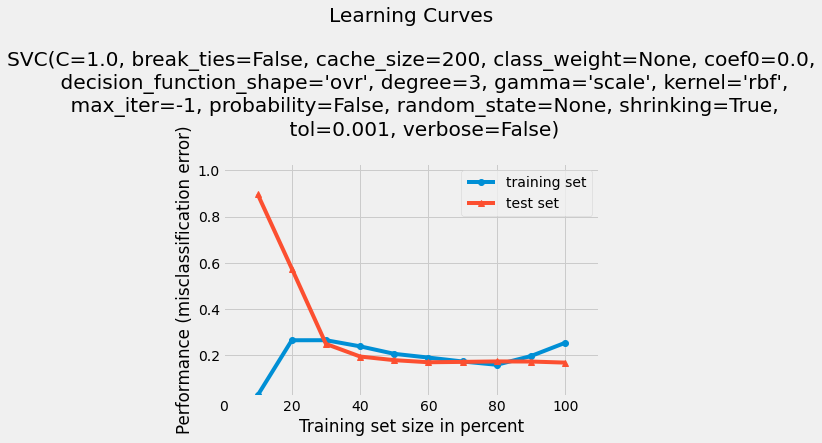

In [27]:
clf = SVC()
plot_learning_curves(X_train_res, y_train_res, Validation_data, Validation_label, clf)
plt.show()

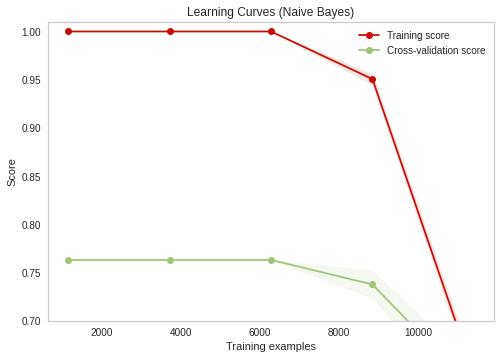

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.model_selection import learning_curve,validation_curve
#from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.metrics import f1_score
#from sklearn.learning_curve import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, scoring= None,cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt






title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = 6

estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01),scoring= f1_score, cv=cv, n_jobs=4)

#title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
#cv = cross_validation.ShuffleSplit(digits.data.shape[0], n_iter=10,
                                   #=0.2, random_state=0)
#estimator = SVC(gamma=0.001)
#plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Validation_label,pred)

In [28]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=1, max_iter=300,).fit(X_train_res, y_train_res)
x = clf.predict(Validation_data)



/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.88865950
Iteration 2, loss = 0.68541974
Iteration 3, loss = 0.52830226
Iteration 4, loss = 0.41377708
Iteration 5, loss = 0.33637277
Iteration 6, loss = 0.28588339
Iteration 7, loss = 0.25599912
Iteration 8, loss = 0.23813725
Iteration 9, loss = 0.22804992
Iteration 10, loss = 0.22267600
Iteration 11, loss = 0.21971858
Iteration 12, loss = 0.21752848
Iteration 13, loss = 0.21574101
Iteration 14, loss = 0.21431010
Iteration 15, loss = 0.21277826
Iteration 16, loss = 0.21157693
Iteration 17, loss = 0.21063656
Iteration 18, loss = 0.20937045
Iteration 19, loss = 0.20823640
Iteration 20, loss = 0.20695085
Iteration 21, loss = 0.20604627
Iteration 22, loss = 0.20561492
Iteration 23, loss = 0.20501468
Iteration 24, loss = 0.20433466
Iteration 25, loss = 0.20402039
Iteration 26, loss = 0.20330582
Iteration 27, loss = 0.20138998
Iteration 28, loss = 0.19974917
Iteration 29, loss = 0.19823973
Iteration 30, loss = 0.19723129
Iteration 31, loss = 0.19657346
Iteration 32, los

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 2, loss = 1.50956182
Iteration 3, loss = 1.24689414
Iteration 4, loss = 1.07956827
Iteration 5, loss = 0.98804643
Iteration 6, loss = 0.94802829
Iteration 7, loss = 0.93051348
Iteration 8, loss = 0.92077835
Iteration 9, loss = 0.91447645
Iteration 10, loss = 0.90641986
Iteration 11, loss = 0.90191019
Iteration 12, loss = 0.89454322
Iteration 13, loss = 0.88918421
Iteration 14, loss = 0.88354312
Iteration 15, loss = 0.87752204
Iteration 16, loss = 0.87212366
Iteration 17, loss = 0.86626199
Iteration 18, loss = 0.86065551
Iteration 19, loss = 0.85553446
Iteration 20, loss = 0.85065765
Iteration 21, loss = 0.84538253
Iteration 22, loss = 0.83959886
Iteration 23, loss = 0.83606534
Iteration 24, loss = 0.83087575
Iteration 25, loss = 0.82720954
Iteration 26, loss = 0.82271188
Iteration 27, loss = 0.81833694
Iteration 28, loss = 0.81439940
Iteration 29, loss = 0.81075804
Iteration 30, loss = 0.80741305
Iteration 31, loss = 0.80485722
Iteration 32, loss = 0.80141522
Iteration 33, lo

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 7, loss = 0.88462089
Iteration 8, loss = 0.87392575
Iteration 9, loss = 0.86507266
Iteration 10, loss = 0.85593441
Iteration 11, loss = 0.84748339
Iteration 12, loss = 0.83892455
Iteration 13, loss = 0.83206055
Iteration 14, loss = 0.82550433
Iteration 15, loss = 0.81928135
Iteration 16, loss = 0.81406185
Iteration 17, loss = 0.80888855
Iteration 18, loss = 0.80357685
Iteration 19, loss = 0.79920016
Iteration 20, loss = 0.79499317
Iteration 21, loss = 0.79220961
Iteration 22, loss = 0.78822579
Iteration 23, loss = 0.78488805
Iteration 24, loss = 0.78218537
Iteration 25, loss = 0.77863821
Iteration 26, loss = 0.77588810
Iteration 27, loss = 0.77256163
Iteration 28, loss = 0.77051332
Iteration 29, loss = 0.76957446
Iteration 30, loss = 0.76668306
Iteration 31, loss = 0.76445595
Iteration 32, loss = 0.76152576
Iteration 33, loss = 0.76055693
Iteration 34, loss = 0.75857627
Iteration 35, loss = 0.75782918
Iteration 36, loss = 0.75489766
Iteration 37, loss = 0.75328853
Iteration 3

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 2, loss = 0.95098622
Iteration 3, loss = 0.83710111
Iteration 4, loss = 0.81161311
Iteration 5, loss = 0.79961367
Iteration 6, loss = 0.78804800
Iteration 7, loss = 0.77732155
Iteration 8, loss = 0.76528363
Iteration 9, loss = 0.75373239
Iteration 10, loss = 0.74562940
Iteration 11, loss = 0.73546008
Iteration 12, loss = 0.72744018
Iteration 13, loss = 0.72133137
Iteration 14, loss = 0.71451436
Iteration 15, loss = 0.70963250
Iteration 16, loss = 0.70724587
Iteration 17, loss = 0.70016785
Iteration 18, loss = 0.69780699
Iteration 19, loss = 0.69355320
Iteration 20, loss = 0.69117344
Iteration 21, loss = 0.68825314
Iteration 22, loss = 0.68665605
Iteration 23, loss = 0.68434917
Iteration 24, loss = 0.68149969
Iteration 25, loss = 0.67953461
Iteration 26, loss = 0.67741350
Iteration 27, loss = 0.67559731
Iteration 28, loss = 0.67441750
Iteration 29, loss = 0.67255792
Iteration 30, loss = 0.67144304
Iteration 31, loss = 0.67060938
Iteration 32, loss = 0.66929403
Iteration 33, lo

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 1.14212195
Iteration 2, loss = 0.65540071
Iteration 3, loss = 0.60176850
Iteration 4, loss = 0.58596671
Iteration 5, loss = 0.57358201
Iteration 6, loss = 0.56117597
Iteration 7, loss = 0.54970933
Iteration 8, loss = 0.53992249
Iteration 9, loss = 0.53134750
Iteration 10, loss = 0.52391614
Iteration 11, loss = 0.51851113
Iteration 12, loss = 0.51447542
Iteration 13, loss = 0.50977142
Iteration 14, loss = 0.50768920
Iteration 15, loss = 0.50388978
Iteration 16, loss = 0.50183974
Iteration 17, loss = 0.50019717
Iteration 18, loss = 0.49766368
Iteration 19, loss = 0.49611934
Iteration 20, loss = 0.49529490
Iteration 21, loss = 0.49282800
Iteration 22, loss = 0.49347944
Iteration 23, loss = 0.49014303
Iteration 24, loss = 0.49084576
Iteration 25, loss = 0.48920324
Iteration 26, loss = 0.48772832
Iteration 27, loss = 0.48524213
Iteration 28, loss = 0.48659392
Iteration 29, loss = 0.48408734
Iteration 30, loss = 0.48267055
Iteration 31, loss = 0.48267735
Iteration 32, los

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 2, loss = 0.66991413
Iteration 3, loss = 0.56323101
Iteration 4, loss = 0.54710410
Iteration 5, loss = 0.53714579
Iteration 6, loss = 0.52740955
Iteration 7, loss = 0.51876846
Iteration 8, loss = 0.51033434
Iteration 9, loss = 0.50374685
Iteration 10, loss = 0.49693000
Iteration 11, loss = 0.49242567
Iteration 12, loss = 0.48763255
Iteration 13, loss = 0.48315808
Iteration 14, loss = 0.47840126
Iteration 15, loss = 0.47603223
Iteration 16, loss = 0.47378597
Iteration 17, loss = 0.47151522
Iteration 18, loss = 0.46993343
Iteration 19, loss = 0.46955991
Iteration 20, loss = 0.46605043
Iteration 21, loss = 0.46409961
Iteration 22, loss = 0.46232829
Iteration 23, loss = 0.46104645
Iteration 24, loss = 0.46257230
Iteration 25, loss = 0.45975385
Iteration 26, loss = 0.45875195
Iteration 27, loss = 0.45661118
Iteration 28, loss = 0.45932680
Iteration 29, loss = 0.45476498
Iteration 30, loss = 0.45484502
Iteration 31, loss = 0.45303688
Iteration 32, loss = 0.45195535
Iteration 33, lo

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 3, loss = 0.98159742
Iteration 4, loss = 0.96521602
Iteration 5, loss = 0.94814869
Iteration 6, loss = 0.93120996
Iteration 7, loss = 0.91493619
Iteration 8, loss = 0.90149068
Iteration 9, loss = 0.89001193
Iteration 10, loss = 0.87844729
Iteration 11, loss = 0.86954228
Iteration 12, loss = 0.86269359
Iteration 13, loss = 0.85337734
Iteration 14, loss = 0.84784794
Iteration 15, loss = 0.84241934
Iteration 16, loss = 0.83792412
Iteration 17, loss = 0.83241506
Iteration 18, loss = 0.82835263
Iteration 19, loss = 0.82392100
Iteration 20, loss = 0.81967422
Iteration 21, loss = 0.81657397
Iteration 22, loss = 0.81311898
Iteration 23, loss = 0.80955185
Iteration 24, loss = 0.80640077
Iteration 25, loss = 0.80367409
Iteration 26, loss = 0.80074080
Iteration 27, loss = 0.79742094
Iteration 28, loss = 0.79621612
Iteration 29, loss = 0.79336014
Iteration 30, loss = 0.78966136
Iteration 31, loss = 0.78652981
Iteration 32, loss = 0.78470917
Iteration 33, loss = 0.78264309
Iteration 34, l

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


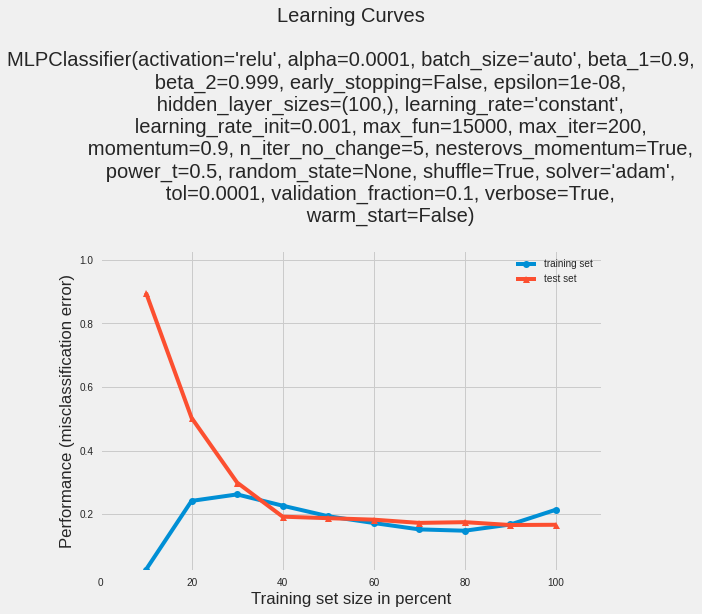

In [76]:
from sklearn.neural_network import MLPClassifier

clf1 = MLPClassifier(verbose=True,n_iter_no_change=5)
plot_learning_curves(X_train_res, y_train_res, Validation_data, Validation_label, clf1)
plt.show()

In [ ]:
for idx in range(0, 100):
  print(list(Validation_label)[idx], x[idx])

In [30]:
clf.score(Validation_data,Validation_label)

0.8379013312451057

In [31]:
from sklearn import metrics

print(metrics.accuracy_score(Validation_label,x))
score1 = metrics.classification_report(Validation_label, x )
print(score1)

0.8379013312451057
                             precision    recall  f1-score   support

                 Allegories       1.00      0.50      0.67         2
          Christmas Stories       1.00      0.25      0.40         8
      Detective and Mystery       0.50      0.41      0.45       259
           Ghost and Horror       0.25      0.12      0.17         8
Humorous and Wit and Satire       0.33      0.05      0.08        22
                   Literary       0.87      0.95      0.91      2091
           Love and Romance       1.00      0.11      0.20        36
          Sea and Adventure       0.71      0.35      0.47        82
            Western Stories       0.58      0.30      0.40        46

                   accuracy                           0.84      2554
                  macro avg       0.69      0.34      0.42      2554
               weighted avg       0.82      0.84      0.82      2554



In [63]:
X = pd.read_csv(r'/content/x_train_syn.csv')
y= pd.read_csv(r'/content/y_train_syn.csv')
train_sizes = [1, 2190,4380,6570,8760,10952]

In [64]:
X.shape

(13690, 21)

In [ ]:
from yellowbrick.model_selection import LearningCurve
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.model_selection import StratifiedKFold
model = MultinomialNB()
visualizer = LearningCurve(
model, cv=5, scoring='acc', train_sizes=train_sizes, n_jobs=4
)
visualizer.fit(X, y) # Fit the data to the visualizer

visualizer.finalize()
#visualizer.show()

In [103]:
train_sizes1, train_scores1, test_scores1 = learning_curve(GaussianNB(), 
                                                        X, 
                                                        y,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=train_sizes)



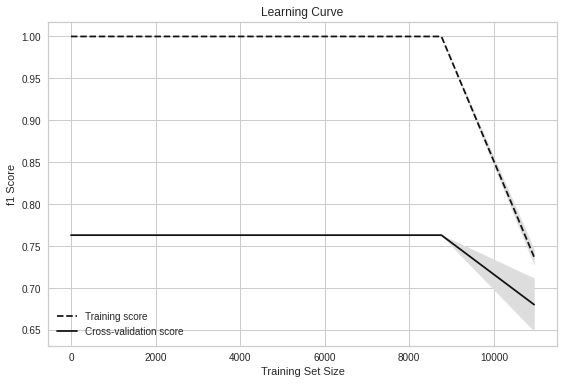

In [104]:
# Create means and standard deviations of training set scores
train_mean1 = np.mean(train_scores1, axis=1)
train_std1 = np.std(train_scores1, axis=1)

# Create means and standard deviations of test set scores
test_mean1 = np.mean(test_scores1, axis=1)
test_std1= np.std(test_scores1, axis=1)

# Draw lines
plt.plot(train_sizes1, train_mean1, '--', color="#111111",  label="Training score")
plt.plot(train_sizes1, test_mean1, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes1, train_mean1 - train_std1, train_mean1 + train_std1, color="#DDDDDD")
plt.fill_between(train_sizes1, test_mean1 - test_std1, test_mean1 + test_std1, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("f1 Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()


In [ ]:
param_range = np.arange(1, 250, 2)
from sklearn.ensemble import RandomForestClassifier
# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(RandomForestClassifier(), 
                                             X, 
                                             y, 
                                             param_name="n_estimators", 
                                             param_range=param_range,
                                             cv=3, 
                                             scoring="accuracy", 
                                             n_jobs=-1)


# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()


In [ ]:
import scikitplot as skplt
rf = GaussianNB()
skplt.estimators.plot_learning_curve(rf, X, y)
plt.show()

**K Means Clustering with Silhouette Coeffecient**

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

range_n_clusters = [2, 3, 4, 5, 6]

X_train_res.shape

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)


In [ ]:
from sklearn.decomposition import PCA
pca_genre = PCA(n_components=2)
principalComponents_genre = pca_genre.fit_transform(df12)
Principal_genre_df = pd.DataFrame(data = principalComponents_genre
             , columns = ['principal component 1', 'principal component 2'])


In [ ]:
print('Explained variation per principal component: {}'.format(pca_genre.explained_variance_ratio_))

In [ ]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Genre Dataset",fontsize=20)
targets = ['Literary', 'Love and Romance','Ghost and Horror','Allegories','Christmas Stories','Humorous and Wit and Satire','Western Stories','Sea and Adventure','Detective and Mystery']
colors = ['#E0E0E0','#CCFFFF','b','#FF0000','g','#FFB266','#FFFF33','#2387CA','m']
ax = plt.gca()
for target, color in zip(targets,colors):
    indicesToKeep = df3['genre'] == target
    ax.set_facecolor('xkcd:gray')
    plt.scatter(Principal_genre_df.loc[indicesToKeep, 'principal component 1']
               , Principal_genre_df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50,edgecolors = 'k')
    

plt.legend(targets,prop={'size': 15})

In [ ]:
Validation_data.shape

In [ ]:
# make predictions using pca with logistic regression
from sklearn.datasets import make_classification
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

# define the model
steps = [ ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# fit the model on the whole dataset
model.fit(X_train_res, y_train_res)
# make a single prediction
#row = [[0.2929949,-4.21223056,-1.288332,-2.17849815,-0.64527665,2.58097719,0.28422388,-7.1827928,-1.91211104,2.73729512,0.81395695,3.96973717,-2.66939799,3.34692332,4.19791821,0.99990998,-0.30201875,-4.43170633,-2.82646737,0.44916808]]
yhat = model.predict(Validation_data)
#print('Predicted Class: %d' % yhat[0])
xc = model.score(Validation_data,Validation_label)

In [ ]:
print(xc)

In [ ]:
data1.shape
#data2.shape

In [33]:
train_sizes = [1, 2190,4380,6570,8760,10952]

In [69]:
print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', test_scores)

Training scores:

 [[1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.        ]
 [0.79309878 0.79309878 0.79309878 0.79309878 0.79309878 0.79309878
  0.79309878 0.79322853 0.79322853 0.79322853]]

 ----------------------------------------------------------------------

Validation scores:

 [[0.66087886 0.66087886 0.66087886 0.66087886 0.66087886 0.66087886
  0.66087886 0.65988799 0.65988799 0.65988799]
 [0.66087886 0.66087886 0.66087886 0.66087886 0.66087886 0.66087886
  0.66087886 0.65988799 0.65988799 0.65988799]
 [0.6

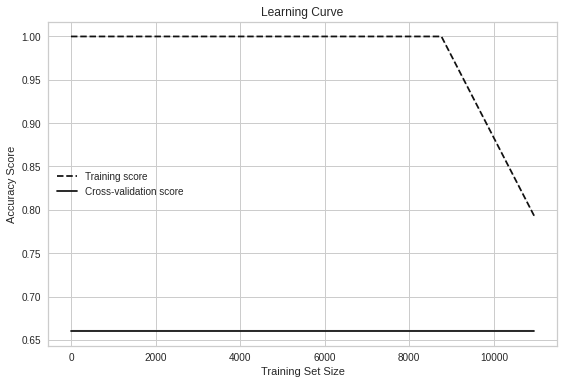

In [70]:
# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(SVC(), 
                                                        X, 
                                                        y,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='mean_squared_error',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=train_sizes)